In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
test.shape

(28000, 784)

In [4]:
train.shape

(42000, 785)

In [6]:
x = train.drop('label',axis = 1).to_numpy()
y = train['label'].to_numpy()

In [7]:
x = x/255

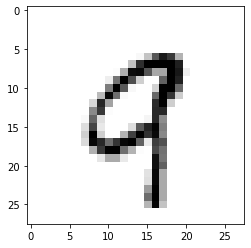

In [32]:
plt.imshow(x[41999].reshape(28,28),cmap = matplotlib.cm.binary)
plt.show()

## Train and test data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [17]:
x_train.shape ,x_test.shape 

((29400, 784), (12600, 784))

In [18]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    prediction = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, prediction))

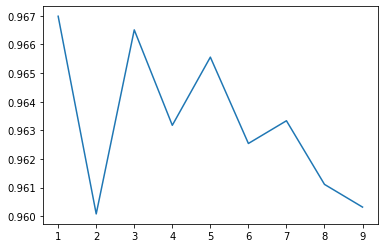

In [19]:
plt.plot(range(1,10),accuracy)

## Training and prediction

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)
metrics.accuracy_score(y_test,predictions)

0.9665079365079365

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.95      1.00      0.97      1389
           2       0.98      0.95      0.97      1294
           3       0.96      0.96      0.96      1355
           4       0.98      0.97      0.97      1222
           5       0.96      0.96      0.96      1085
           6       0.98      0.98      0.98      1256
           7       0.96      0.97      0.96      1359
           8       0.98      0.93      0.96      1209
           9       0.95      0.95      0.95      1231

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [22]:
test = test/255

predictions = knn.predict(test)

In [23]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [24]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [38]:
x = test.to_numpy()
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Prediccion: 2


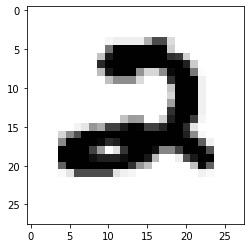

Prediccion: 0


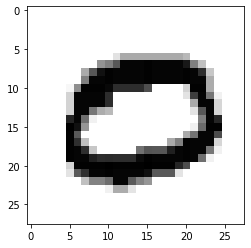

Prediccion: 9


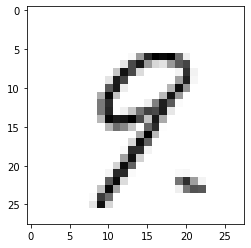

Prediccion: 9


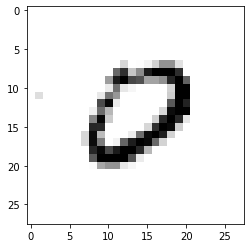

Prediccion: 3


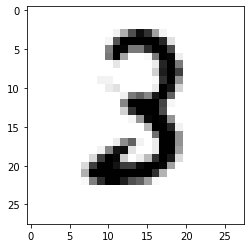

Prediccion: 7


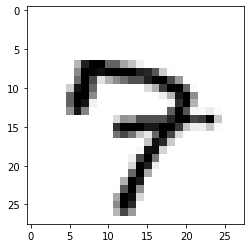

Prediccion: 0


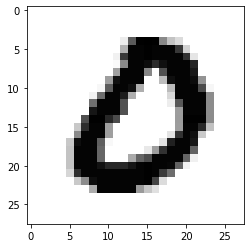

Prediccion: 3


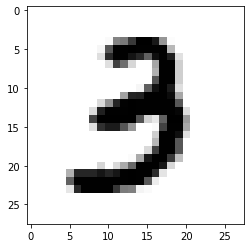

Prediccion: 0


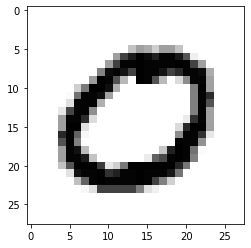

Prediccion: 3


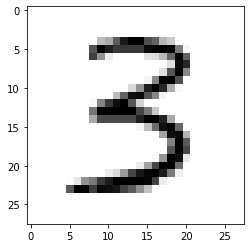

Prediccion: 5


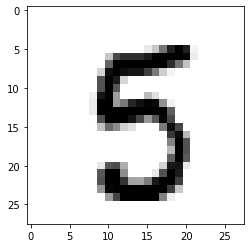

In [45]:
for i in range(0,11):
    print('Prediccion:', predictions[i])
    plt.imshow(x[i].reshape(28,28),cmap = matplotlib.cm.binary)
    plt.show()